# Decision Trees 
Los Arboles de Decision son algoritmos que pueden hacer dos tipos de Tareas en Machine Learning, Regression y clasificacion. 
Estos son muy utiles debido a que son faciles de interpretar, son muy intuitivos,  efectivos y buenos para tomar decisiones debido a que simulan la forma en la que tomamos decisiones. Hace esto creando una estructura en base de preguntas que le permite dividir y agrupar los datos. 

Intuicion:
* Empieza por un nodo (Root Node) 
* Divide los datos en grupos 
* Asigna un nodo para crecer el arbol
* Repite el proceso hasta que hallas dividido o separado los datos



![alt text](https://cdn-images-1.medium.com/max/800/1*q6Fvx4dukax2GqX93QnSQg.gif)

Ventajas:
* Facil de interpretar
* Requiere muy poca preparacion de los datos
* Trabaja con datos Numericos y Categoricos

Desventajas:
* Tiene a overfitting
* Son instables osu estructura  varia mucho con ligeros cambios
* Tendencia por clases con mas ocurrencia (Se ocupa un dataset balanceado) 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import log2 as log

# numero mas pequeño para manejar 
eps = np.finfo(float).eps



### Dataset 
Una de las ventajas de los DT es que puedes manejar valores como strings o valores nulos, tambien descarta la posibilidad de utilizar normalizacion ya que basa su Objetivo en la entropia de la informacion. 

In [4]:
dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
       'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
       'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
       'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}

df = pd.DataFrame(dataset,columns=['Taste','Temperature','Texture','Eat'])
df

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No
2,Spicy,Hot,Hard,Yes
3,Spicy,Cold,Hard,No
4,Spicy,Hot,Hard,Yes
5,Sweet,Cold,Soft,Yes
6,Salty,Cold,Soft,No
7,Sweet,Hot,Soft,Yes
8,Spicy,Cold,Soft,Yes
9,Salty,Hot,Hard,Yes


### Entropia 
Medida del desorden de la informacion, en este caso mide que tan iguales son los datos.
Queremos encontrar la caracteristica que maximize la informacion disminuyendo la entropia 

$$ H(p_i)= - \sum_{i=1} p_ilog_2(p_i) $$

* $H(p_i)$= entropia 

* $p_i$=vector de probabilidades de ocurrencia
* $p_i= \frac{E}{T}$
* $E$ = numero de elementos en el grupo

* $T $ = Total de eventos


![alt text](https://cdn-images-1.medium.com/max/600/0*1tHgXsfaZj3iDycV.png)


In [0]:
entropy_node = 0  #Initializar Entropy
values = df.Eat.unique()  #Objectos unicos - 'Yes', 'No'

for value in values:
    fraction = df.Eat.value_counts()[value]/len(df.Eat)  
    entropy_node += -fraction*np.log2(fraction)

In [10]:
df.Eat.value_counts()

Yes    6
No     4
Name: Eat, dtype: int64

In [11]:
# Entropy
entropy_node

0.9709505944546686

En esta parte sirve para es

In [0]:
attribute = 'Taste' # atributo o grupo
target_variables = df.Eat.unique()  # Categorias o Clases:  'Yes' and 'No'
variables = df[attribute].unique()    # Retorna diferentes categorias de los atributos o grupos. En este Caso son "Salty", "Spicy", "Sweet"
entropy_attribute = 0 # inicializar entropia


for variable in variables:
    entropy_each_feature = 0
    
    # Calcula la entropia en el nodo
    for target_variable in target_variables:
        num = len(df[attribute][df[attribute]==variable][df.Eat ==target_variable]) #numerador
        den = len(df[attribute][df[attribute]==variable])  #denominador
        fraction = num/(den+eps)  #pi, se suma eps para evitar division entre cero
        entropy_each_feature += -fraction*log(fraction+eps) # Calcula la entropia
        
    # Calcula la Entropia del grupo    
    fraction2 = den/len(df)
    entropy_attribute += -fraction2*entropy_each_feature   

In [17]:
abs(entropy_attribute)

0.7609640474436806

In [0]:
def find_entropy(df):
    Class = df.keys()[-1]   # Ultima columna o Clase Yes NO 
    entropy = 0
    values = df[Class].unique() # 0 | 1 Valores unicos de tu grupo donde te retorna una lista  
    
    # Calcular entropia
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    
    return entropy
  


In [0]:
  
def find_entropy_attribute(df, attribute):
    Class = df.keys()[-1]   #Clase o categoria a predecir
    target_variables = df[Class].unique()  # 'Yes' | 'No'
    variables = df[attribute].unique()    #Variables unicas del grupo ('Hot','Cold' en Temperature)
    entropy2 = 0
    
    for variable in variables:
        entropy = 0
        
        # Entropia de cada rama
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
            
        # Entropia del grupo    
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)



### Ganancia de Informacion 

IG = entropia del rama - entropia del atributo o grupo

$$ IG = H_0(p_i)  - \sum_{i=1}H(p_i) $$

Donde $H_0$ es la entropia del nodo 

En esta parte queremos encontrar la estructura o atributo que Maximice la ganancia de informacion y que disminuya la entropia o desorden.

In [0]:

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        # Information Gain
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
        
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)



### Modelo 

In [0]:

def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #Clase 
    
    

    # Obten el atributo que maximice la ganancia de informacion
    node = find_winner(df)
    
    #Obten los distintos valores de tu atributo o grupo
    attValue = np.unique(df[node])
    
    #Crear un diccionario vacio para construir el Arbol o estructura de decision    
    if tree is None:                    
        tree={}
        tree[node] = {}
    

    for value in attValue:
        
        # Obetener subtabla
        subtable = get_subtable(df,node,value)  
        clValue,counts = np.unique(subtable['Eat'],return_counts=True)                        
        
        if len(counts)==1:
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable)  
                   
    return tree

### Estructura del Arbol de Decision

In [22]:
tree =buildTree(df)
tree

{'Taste': {'Salty': {'Texture': {'Hard': 'Yes', 'Soft': 'No'}},
  'Spicy': {'Temperature': {'Cold': {'Texture': {'Hard': 'No', 'Soft': 'Yes'}},
    'Hot': {'Texture': {'Hard': 'Yes', 'Soft': 'No'}}}},
  'Sweet': 'Yes'}}

### Prediccion 

In [0]:
def predict(inst,tree):


    for nodes in tree.keys():        
        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction

In [24]:
datos=df.iloc[6]
print(datos)
prediccion=predict(datos,tree)
print(f'Prediccion: {prediccion}')


Taste          Salty
Temperature     Cold
Texture         Soft
Eat               No
Name: 6, dtype: object
Prediccion: No


In [25]:
new_data={"Taste":'Salty', 'Temperature':'Cold','Texture':'Hard'}
new_data=pd.Series(new_data)
new_data


Taste          Salty
Temperature     Cold
Texture         Hard
dtype: object

In [26]:
pred=predict(new_data,tree)
pred

'Yes'

## Decision Trees con Sklearn

In [0]:
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()


In [0]:
# Modelo
clf = tree.DecisionTreeClassifier()

# Entrenar
clf = clf.fit(iris.data, iris.target)

In [0]:
! pip install graphviz
! apt-get install graphviz

Visualizamos nuestro Dataset 

In [45]:
import graphviz  
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

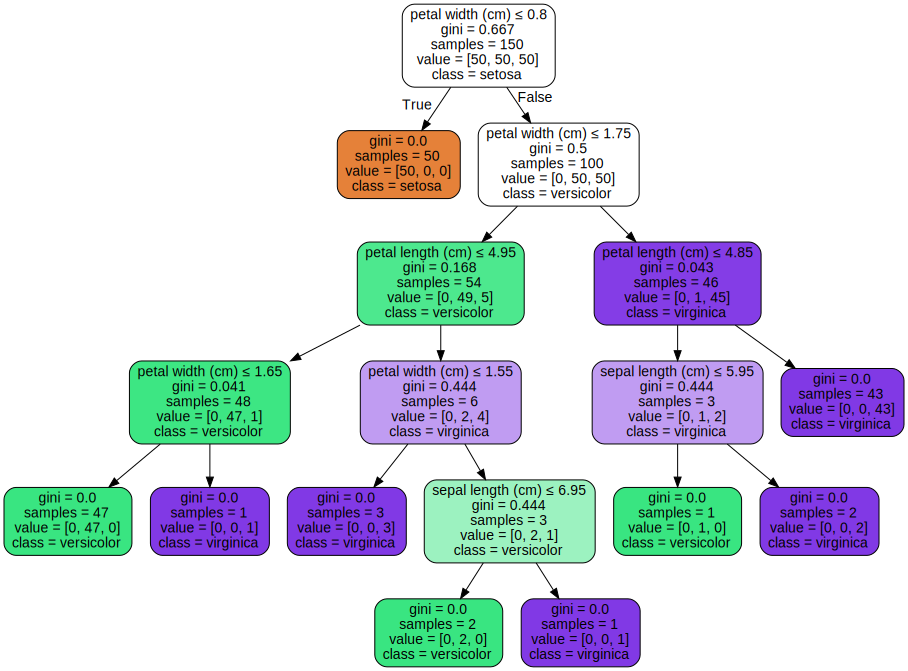

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 